now we calcuate all prescriped values in all datatsets

# datasets7

In [2]:
import pandas as pd
import numpy as np
import networkx as nx


In [3]:
df7=pd.read_csv("C:\\Users\\Shubham\\Desktop\\mini marathon challenge\\Dataset-7 - Dataset-7.csv")

In [139]:
df7.head(3)

,Unnamed: 0,Demand,Demand Growth Rate,L,Initial Possible Truck Size,Possible Truck Size,Maximum Warehouse Size,Travel Time between Depot and each Warehouses [days],Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,Depot/Warehouse Name,NaN,NaN,NaN,NaN,NaN,NaN,Depo,wh.1,wh.2,...,wh.6,wh.7,wh.8,wh.9,wh.10,wh.11,wh.12,wh.13,wh.14,wh.15
1,Depo,0.000000,0.0,445.0,320.0,320.0,-,0,1.0289,1.3505,...,1.7588,1.9453,1.7203,1.865,1.9293,1.865,2.2186,2.2026,2.508,2.4598
2,wh.1,8.837866,0.0,445.0,20.0,320.0,100,1.0289,0,0.3215,...,0.7299,0.9164,0.6913,0.836,0.9003,0.836,1.1897,1.1736,1.4791,1.4309


In [148]:
df7.describe()

,Demand,Demand Growth Rate,L,Initial Possible Truck Size,Possible Truck Size
count,16.000000,16.0,16.00000,16.00,16.0
mean,2.444985,0.0,1446.25000,38.75,320.0
std,2.016401,0.0,1939.71003,75.00,0.0
min,0.000000,0.0,445.00000,20.00,320.0
25%,1.505786,0.0,445.00000,20.00,320.0
50%,1.756324,0.0,445.00000,20.00,320.0
75%,2.634487,0.0,890.00000,20.00,320.0
max,8.837866,0.0,5340.00000,320.00,320.0


networkx graph plot

In [140]:
G7= nx.from_pandas_edgelist(df7 ,'Unnamed: 0' ,  'Demand','Travel Time between Depot and each Warehouses [days]')

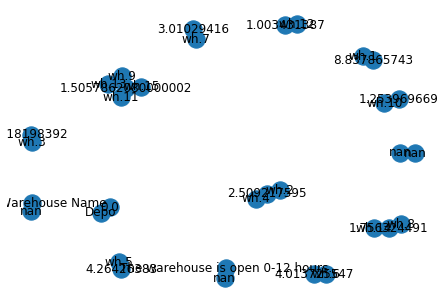

In [142]:
nx.draw(G7, with_labels=True)

now we will do calculation for all datasets

total Cost = Equipment Cost + Normalized Operating Cost + Investment Cos

In [6]:
data11=df7.iloc[2:17,4:5]
#x3=data11[]
x3=data11['Initial Possible Truck Size'].values
x3

array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20.])

In [8]:
data12=df7.iloc[2:17,3:4]
#data12
x4=data12['L'].values
x4

array([ 445.,  445., 5340., 5340., 5340.,  445.,  445.,  445.,  445.,
        445.,  445.,  445.,  890.,  890.,  890.])

In [11]:
data13=df7.iloc[2:17, 5:6]
x5=data13['Possible Truck Size'].values
x5

array([320., 320., 320., 320., 320., 320., 320., 320., 320., 320., 320.,
       320., 320., 320., 320.])

In [13]:
px=x5/x3
logpx=np.log(px)
investment_cast=x4*logpx


Equipment Cost = Truck Purchase Cost + Warehouse Purchase Cost Truck Purchase Cost = (8350.6 * ln(C) - 14542.5) * Number of days used / 7300

In [15]:
c={'maximum load capicity':[20,40,60,80,100,120,140,180,200,220,240,260,280,300,320]}
maxload = pd.DataFrame(c) 
maxload1=maxload['maximum load capicity'].values
lnc=np.log(maxload1)
lnc
purchase=df7.iloc[2:17, 7:8]
purchase=purchase['Travel Time between Depot and each Warehouses [days]'].values.astype(float)
purchase

array([1.0289, 1.3505, 1.5916, 1.5916, 1.5916, 1.7588, 1.9453, 1.7203,
       1.865 , 1.9293, 1.865 , 2.2186, 2.2026, 2.508 , 2.4598])

In [17]:
truck=(8350.6*lnc-14542.5)
truck_purchase_cast=truck*purchase/7300
truck_purchase_cast

array([ 1.47621243,  3.0084435 ,  4.28374424,  4.80751536,  5.21378381,
        6.12831659,  7.12117815,  6.79207561,  7.5881559 ,  8.06012017,
        7.97712194,  9.69270722,  9.80952774, 11.36759793, 11.33072881])

Warehouse Purchase Cost = 29.725 * T * Number of days used / 7300

In [21]:
T1=df7.iloc[2:17,6:7]
#T1 = T1.sort_values('Maximum Warehouse Size')
T2=T1['Maximum Warehouse Size'].values.astype(int)
T2

array([100,  60,  20,  20,  20, 160,  60,  40,  40,  40,  40,  60,  20,
        20,  20])

In [22]:
T=np.subtract(T2,maxload1)
T.astype(int)

array([  80,   20,  -40,  -60,  -80,   40,  -80, -140, -160, -180, -200,
       -200, -260, -280, -300])

In [24]:
Tc=T2*29.725
Tc

array([2972.5, 1783.5,  594.5,  594.5,  594.5, 4756. , 1783.5, 1189. ,
       1189. , 1189. , 1189. , 1783.5,  594.5,  594.5,  594.5])

In [26]:
warehouse_cast=Tc*purchase/7300
warehouse_cast

array([0.41895962, 0.3299475 , 0.12961729, 0.12961729, 0.12961729,
       1.14587025, 0.4752661 , 0.28019681, 0.30376507, 0.31423804,
       0.30376507, 0.54203741, 0.17937612, 0.2042474 , 0.20032207])

Equipment Cost = Truck Purchase Cost +Warehouse Purchase Cost

In [134]:
equipment_cost=warehouse_cast+truck_purchase_cast
equipment_cost

array([ 2.0627559 ,  3.338391  ,  5.19106525,  5.19636723,  5.60263567,
        6.55801794,  8.07171036,  7.07227242,  7.89192097,  8.37435822,
        8.280887  ,  9.87338635,  9.98890386, 11.57184533, 11.53105088])

Normalized Operating Cost = TruNormalized Operating Cost = Truck Operating Cost * Total Demand consumed in 7300 days / (Total Demand consumed in 7300 days + total stock of products at the end - total stock of products at the beginning) Truck Operating Cost = (1.67012 * ln(C) - 2.9885) * truck operation days + number of truck stops at depot or warehouse * 2ck Operating Cost * Total Demand consumed in 7300 days / (Total Demand consumed in 7300 days + total stock of products at the end - total stock of products at the beginning)

In [27]:
#data4=pd.DataFrame(x)
x={'trucks operation day':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
data4=pd.DataFrame(x)
day=data4['trucks operation day'].values
day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [28]:
truck_stop={'trucks operation day':[1,2,3,4,5,5,4,3,2,1,5,4,3,2,1]}
stop=pd.DataFrame(truck_stop)
stop=stop['trucks operation day'].values
stop

array([1, 2, 3, 4, 5, 5, 4, 3, 2, 1, 5, 4, 3, 2, 1], dtype=int64)

Truck Operating Cost = (1.67012 * ln(C) - 2.9885) * <truck operation days>  + <number of truck stops at depot or warehouse> * 2

C: Maximum load capacity of a truck (20 ~ 320, 20 increments)

“truck operation days” is the actual days took that truck was moving. Loading/Unloading and parking time are not included.

In [30]:
operating_cast=1.67012*lnc-2.9885
truck_operating_cast=operating_cast*(day+stop*2)
truck_operating_cast

array([  6.04419715,  19.03422812,  34.64592066,  51.96012388,
        70.54030247,  80.11497135,  78.96953764,  79.58105534,
        76.1842354 ,  72.23406285, 129.46131825, 125.97011211,
       122.02322143, 117.67502136, 112.96990045])

In [33]:
demand=df7.iloc[2:17,1:2]
demand
demand=demand['Demand'].values
demand

array([8.83786574, 2.50921759, 2.18198392, 2.50921759, 4.26426383,
       4.01372555, 3.01029416, 1.75632449, 1.50578621, 1.25396967,
       1.50578621, 1.00343139, 1.50578621, 1.75632449, 1.50578621])

In [34]:
beg=df7.iloc[2:17,4:5]
beg
beg1=beg['Initial Possible Truck Size'].values
beg1

array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20.])

In [36]:
end=df7.iloc[2:17,5:6]
end=end['Possible Truck Size'].values

In [37]:
new=end-beg1

In [38]:
demand1=demand+new
demand2=demand/demand1
normalised_cast=truck_operating_cast*demand2
normalised_cast
totalcast=normalised_cast+warehouse_cast+truck_purchase_cast+investment_cast
totalcast

array([ 1235.87011736,  1237.29825526, 14810.28730821, 14810.99190209,
       14811.95580024,  1242.13388202,  1242.18295853,  1241.33744264,
        1242.07438319,  1242.4770139 ,  1242.7294267 ,  1244.45666265,
        2478.20227746,  2479.86071679,  2479.6992102 ])

In [132]:
w=df7.iloc[2:17, 0:1]
w1=w['Unnamed: 0'].values
w1


array(['wh.1', 'wh.2', 'wh.3', 'wh.4', 'wh.5', 'wh.6', 'wh.7', 'wh.8',
       'wh.9', 'wh.10', 'wh.11', 'wh.12', 'wh.13', 'wh.14', 'wh.15'],
      dtype=object)

In [160]:
w2=df7.iloc[2:17, 2:3]
w2=w2['Demand Growth Rate'].values
w2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [162]:
w3=df7['Unnamed: 0'].values
w4=df7['Demand'].values
w5=df7['Maximum Warehouse Size'].values
import pandas 
df=pandas.DataFrame(data={"Ware":w3,"Demand":w4,"Maximum Warehouse Size":w5})
df.to_csv("./dataset7_warehouse_input.csv", sep=',',index=False)

In [163]:
import pandas
df = pandas.DataFrame(data={"Warehouse":w1,"Demand Growth Rate":w2,"L":x4,"possible truck size":x5,"intial possible truck size":x3,"maximum loading capicity":
                            maxload1,"number of days  used":purchase,"maximum warehouse size":T2,"truck operation day":
                            day,"truck stopage":stop,"Demand":demand,
                            "total stock of products at the end":end,
                            "total stock of products at the begining":beg1,
                            "Normalised Operating  Cost": normalised_cast, "Equipment cast":equipment_cost,"truck operating cast": truck_operating_cast,"truck  purchase cast":truck_purchase_cast,"Investment Cost" : investment_cast,
                            "total cast(Equipment cost + Normalized Operating Cost + Investment Cost)":totalcast})
df.to_csv("./dataset7_solution.csv", sep=',',index=False)

# conclusion

at last we computed all condition for above datasets and corresponding which we have find total cast and warehouse wh1, wh2,...., and also find truck purchase cast, investment cast , equipment cast, normalized cast, and also find minimum time interval between two stop of truck and also find time interval and demand of the truck with corresponding demand growth rate 

# loading dataset8


now we calcuate all prescriped values in all datatsets

In [40]:
df8=pd.read_csv("C:\\Users\\Shubham\\Desktop\\mini marathon challenge\\Dataset-8 - Dataset-8.csv")

In [42]:
df8.head(2)

,Unnamed: 0,Demand,Demand Growth Rate,L,Initial Possible Truck Size,Possible Truck Size,Maximum Warehouse Size,Travel Time between Depot and each Warehouses [days],Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,Depot/Warehouse Name,NaN,NaN,NaN,NaN,NaN,NaN,Depo,wh.1,wh.2,...,wh.6,wh.7,wh.8,wh.9,wh.10,wh.11,wh.12,wh.13,wh.14,wh.15
1,Depo,0.0,0.0,890.0,320.0,320.0,-,0,1.3987,1.8006,...,0.418,1.0772,1.045,1.1415,1.0289,1.2862,1.1736,0.7878,0.4823,1.045


In [147]:
df8.describe()

,Demand,Demand Growth Rate,L,Initial Possible Truck Size,Possible Truck Size
count,16.000000,16.0,16.000000,16.00,16.0
mean,3.728625,0.0,1974.687500,38.75,320.0
std,1.416280,0.0,2332.008054,75.00,0.0
min,0.000000,0.0,890.000000,20.00,320.0
25%,3.102000,0.0,890.000000,20.00,320.0
50%,4.344500,0.0,890.000000,20.00,320.0
75%,4.526500,0.0,890.000000,20.00,320.0
max,5.425000,0.0,6675.000000,320.00,320.0


drawing networkx graph

In [143]:
G8= nx.from_pandas_edgelist(df8 ,'Unnamed: 0' ,  'Demand','Travel Time between Depot and each Warehouses [days]')

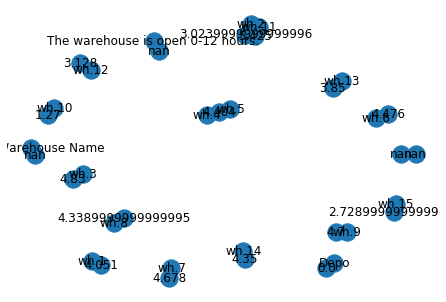

In [144]:
nx.draw(G8, with_labels=True)

In [46]:
data11=df8.iloc[2:17,4:5]
#x3=data11[]
x3=data11['Initial Possible Truck Size'].values
x3

array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20.])

In [48]:
data12=df8.iloc[2:17,3:4]
#data12
x4=data12['L'].values
x4

array([ 890.,  890.,  890.,  890.,  890.,  890., 6675., 6675., 6675.,
        890.,  890.,  890.,  890.,  890.,  890.])

In [49]:
data13=df8.iloc[2:17, 5:6]
x5=data13['Possible Truck Size'].values
x5

array([320., 320., 320., 320., 320., 320., 320., 320., 320., 320., 320.,
       320., 320., 320., 320.])

In [50]:
px=x5/x3
logpx=np.log(px)
investment_cast=x4*logpx

In [51]:
investment_cast

array([ 2467.60396279,  2467.60396279,  2467.60396279,  2467.60396279,
        2467.60396279,  2467.60396279, 18507.02972095, 18507.02972095,
       18507.02972095,  2467.60396279,  2467.60396279,  2467.60396279,
        2467.60396279,  2467.60396279,  2467.60396279])


Equipment Cost = Truck Purchase Cost + Warehouse Purchase Cost
Truck Purchase Cost = (8350.6 * ln(C) - 14542.5) * Number of days used / 730

In [52]:
c={'maximum load capicity':[20,40,60,80,100,120,140,180,200,220,240,260,280,300,320]}
maxload = pd.DataFrame(c) 
maxload1=maxload['maximum load capicity'].values
lnc=np.log(maxload1)
lnc

array([2.99573227, 3.68887945, 4.09434456, 4.38202663, 4.60517019,
       4.78749174, 4.94164242, 5.19295685, 5.29831737, 5.39362755,
       5.48063892, 5.56068163, 5.6347896 , 5.70378247, 5.768321  ])

In [53]:
purchase=df8.iloc[2:17, 7:8]
purchase=purchase['Travel Time between Depot and each Warehouses [days]'].values.astype(float)
purchase

array([1.3987, 1.8006, 1.1897, 0.9325, 0.8039, 0.418 , 1.0772, 1.045 ,
       1.1415, 1.0289, 1.2862, 1.1736, 0.7878, 0.4823, 1.045 ])

In [54]:
truck=(8350.6*lnc-14542.5)

In [55]:
truck_purchase_cast=truck*purchase/7300
truck_purchase_cast

array([2.00678232, 4.01110949, 3.2020423 , 2.81666755, 2.63342599,
       1.45646824, 3.94331625, 4.1258612 , 4.64443966, 4.2984801 ,
       5.50143391, 5.12726999, 3.50855623, 2.18604166, 4.8136481 ])

Warehouse Purchase Cost = 29.725 * T * Number of days used / 7300

In [56]:
T1=df8.iloc[2:17, 6:7]
#T1 = T1.sort_values('Maximum Warehouse Size')
T2=T1['Maximum Warehouse Size'].values.astype(int)
T2

array([320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320,
       320, 320])

In [57]:
maxload1

array([ 20,  40,  60,  80, 100, 120, 140, 180, 200, 220, 240, 260, 280,
       300, 320], dtype=int64)

In [58]:
T=np.subtract(T2,maxload1)
T.astype(int)

array([300, 280, 260, 240, 220, 200, 180, 140, 120, 100,  80,  60,  40,
        20,   0])

In [60]:
Tc=T*29.725
Tc

array([8917.5, 8323. , 7728.5, 7134. , 6539.5, 5945. , 5350.5, 4161.5,
       3567. , 2972.5, 2378. , 1783.5, 1189. ,  594.5,    0. ])

In [61]:
warehouse_cast=Tc*purchase/7300
warehouse_cast

array([1.70861743, 2.05293066, 1.25953376, 0.91129521, 0.72015124,
       0.34041233, 0.78952858, 0.59572158, 0.5577713 , 0.41895962,
       0.41898405, 0.28672816, 0.12831427, 0.03927772, 0.        ])

In [62]:
equipment_cost=warehouse_cast+truck_purchase_cast
equipment_cost

array([3.71539975, 6.06404015, 4.46157606, 3.72796276, 3.35357723,
       1.79688057, 4.73284483, 4.72158277, 5.20221096, 4.71743972,
       5.92041796, 5.41399815, 3.6368705 , 2.22531938, 4.8136481 ])

Normalized Operating Cost = Truck Operating Cost * Total Demand consumed in 7300 days / (Total Demand consumed in 7300 days + total stock of products at the end - total stock of products at the beginning)
Truck Operating Cost = (1.67012 * ln(C) - 2.9885) * truck operation days + number of truck stops at depot or warehouse * 2

In [63]:
data4=pd.DataFrame(x)
x={'trucks operation day':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
day=data4['trucks operation day'].values
day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [64]:
truck_stop={'trucks operation day':[1,2,3,4,5,5,4,3,2,1,5,4,3,2,1]}
stop=pd.DataFrame(truck_stop)
stop=stop['trucks operation day'].values
stop

array([1, 2, 3, 4, 5, 5, 4, 3, 2, 1, 5, 4, 3, 2, 1], dtype=int64)

Truck Operating Cost = (1.67012 * ln(C) - 2.9885) * <truck operation days>  + <number of truck stops at depot or warehouse> * 2

C: Maximum load capacity of a truck (20 ~ 320, 20 increments)

“truck operation days” is the actual days took that truck was moving. Loading/Unloading and parking time are not included.

In [65]:
operating_cast=1.67012*lnc-2.9885
truck_operating_cast=operating_cast*(day+stop*2)
truck_operating_cast

array([  6.04419715,  19.03422812,  34.64592066,  51.96012388,
        70.54030247,  80.11497135,  78.96953764,  79.58105534,
        76.1842354 ,  72.23406285, 129.46131825, 125.97011211,
       122.02322143, 117.67502136, 112.96990045])

In [67]:
demand=df8.iloc[2:17,1:2]
demand
demand=demand['Demand'].values
demand

array([4.051, 5.425, 4.83 , 4.404, 4.404, 4.476, 4.678, 4.339, 4.7  ,
       1.27 , 3.024, 3.128, 3.85 , 4.35 , 2.729])

In [69]:
beg=df8.iloc[2:17,4:5]
beg
beg1=beg['Initial Possible Truck Size'].values
beg1

array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20.])

In [71]:
end=df8.iloc[2:17,5:6]
end=end['Possible Truck Size'].values

In [72]:
new=end-beg1

In [73]:
demand1=demand+new
demand2=demand/demand1
normalised_cast=truck_operating_cast*demand2
normalised_cast
totalcast=normalised_cast+warehouse_cast+truck_purchase_cast+investment_cast
totalcast

array([ 2471.39989194,  2474.00609147,  2472.6144999 ,  2472.08366464,
        2471.97808999,  2470.5785868 , 18512.97505732, 18512.88590099,
       18513.40707437,  2472.62590432,  2474.81632801,  2474.31785574,
        2472.78695606,  2471.51118243,  2473.43599651])

In [129]:
w=df9.iloc[2:17, 0:1]
w1=w['Unnamed: 0'].values
w1

array(['wh.1', 'wh.2', 'wh.3', 'wh.4', 'wh.5', 'wh.6', 'wh.7', 'wh.8',
       'wh.9', 'wh.10', 'wh.11', 'wh.12', 'wh.13', 'wh.14', 'wh.15'],
      dtype=object)

In [ ]:
w2=df8.iloc[2:17, 2:3]
w2=w2['Demand Growth Rate'].values
w2

In [164]:
w3=df8['Unnamed: 0'].values
w4=df8['Demand'].values
w5=df8['Maximum Warehouse Size'].values
import pandas 
df=pandas.DataFrame(data={"Ware":w3,"Demand":w4,"Maximum Warehouse Size":w5})
df.to_csv("./dataset8_warehouse_input.csv", sep=',',index=False)

In [168]:
import pandas
df = pandas.DataFrame(data={"WareHouse":w1,"Demand Growth Rate":w2,"L":x4,"possible truck size":x5,"intial possible truck size":x3,"maximum loading capicity":
                            maxload1,"number of days  used":purchase,"maximum warehouse size":T2,"truck operation day":
                            day,"truck stopage":stop,"Demand":demand,
                            "total stock of products at the end":end,
                            "total stock of products at the begining":beg1,
                            "Normalised Operating  Cost": normalised_cast,"Equipment cost":equipment_cost, "truck operating cast": truck_operating_cast,"truck  purchase cast":truck_purchase_cast,"Investment Cost" : investment_cast,
                            "total cast(Equipment cost + Normalized Operating Cost + Investment Cost)":totalcast})
df.to_csv("./dataset8_solution.csv", sep=',',index=False)

# conclusion

at last we computed all condition for above datasets and corresponding which we have find total cast and warehouse wh1, wh2,...., and also find truck purchase cast, investment cast , equipment cast, normalized cast, and also find minimum time interval between two stop of truck and also find time interval and demand of the truck with corresponding demand growth rate 

# for last datasets dataset 9

In [75]:
df9=pd.read_csv("C:\\Users\\Shubham\\Desktop\\mini marathon challenge\\Dataset-9 - Dataset-9.csv")

In [76]:
df9.head(3)

,Unnamed: 0,Demand,Demand Growth Rate,L,Initial Possible Truck Size,Possible Truck Size,Maximum Warehouse Size,Travel Time between Depot and each Warehouses [days],Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,Depot/Warehouse Name,NaN,NaN,NaN,NaN,NaN,NaN,Depo,wh.1,wh.2,...,wh.6,wh.7,wh.8,wh.9,wh.10,wh.11,wh.12,wh.13,wh.14,wh.15
1,Depo,0.000000,0.0041,445.0,320.0,320.0,-,0,1.0289,1.3505,...,1.7588,1.9453,1.7203,1.865,1.9293,1.865,2.2186,2.2026,2.508,2.4598
2,wh.1,4.028745,0.0041,445.0,20.0,320.0,140,1.0289,0,0.3215,...,0.7299,0.9164,0.6913,0.836,0.9003,0.836,1.1897,1.1736,1.4791,1.4309


In [146]:
df9.describe()

,Demand,Demand Growth Rate,L,Initial Possible Truck Size,Possible Truck Size
count,16.000000,16.0000,16.00000,16.00,16.0
mean,1.223803,0.0041,1446.25000,38.75,320.0
std,1.003957,0.0000,1791.09045,75.00,0.0
min,0.000000,0.0041,445.00000,20.00,320.0
25%,0.686413,0.0041,445.00000,20.00,320.0
50%,0.800621,0.0041,445.00000,20.00,320.0
75%,1.486597,0.0041,1446.25000,20.00,320.0
max,4.028745,0.0041,4450.00000,320.00,320.0


Drawing networkx graph

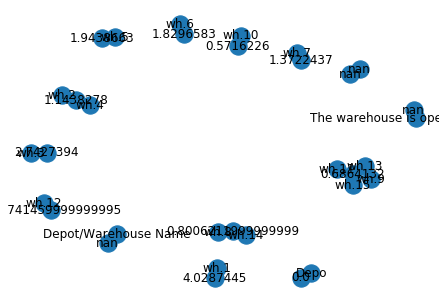

In [145]:
G9= nx.from_pandas_edgelist(df9 ,'Unnamed: 0' ,  'Demand','Travel Time between Depot and each Warehouses [days]')
nx.draw(G9, with_labels=True)

now the calculation will be done along columns and rows of provided formula

In [79]:
data11=df9.iloc[2:17,4:5]
#x3=data11[]
x3=data11['Initial Possible Truck Size'].values
x3

array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20.])

In [81]:
data12=df9.iloc[2:17,3:4]
#data12
x4=data12['L'].values
x4

array([ 445.,  445.,  445.,  445.,  445.,  445.,  445.,  445.,  445.,
        445.,  445., 4450., 4450., 4450., 4450.])

In [83]:
data13=df9.iloc[2:17, 5:6]
x5=data13['Possible Truck Size'].values
x5

array([320., 320., 320., 320., 320., 320., 320., 320., 320., 320., 320.,
       320., 320., 320., 320.])

In [84]:
px=x5/x3
logpx=np.log(px)
investment_cast=x4*logpx

In [85]:
investment_cast

array([ 1233.8019814 ,  1233.8019814 ,  1233.8019814 ,  1233.8019814 ,
        1233.8019814 ,  1233.8019814 ,  1233.8019814 ,  1233.8019814 ,
        1233.8019814 ,  1233.8019814 ,  1233.8019814 , 12338.01981397,
       12338.01981397, 12338.01981397, 12338.01981397])


Equipment Cost = Truck Purchase Cost + Warehouse Purchase Cost
Truck Purchase Cost = (8350.6 * ln(C) - 14542.5) * Number of days used / 7300

In [86]:
c={'maximum load capicity':[20,40,60,80,100,120,140,180,200,220,240,260,280,300,320]}
maxload = pd.DataFrame(c) 
maxload1=maxload['maximum load capicity'].values
lnc=np.log(maxload1)
lnc

array([2.99573227, 3.68887945, 4.09434456, 4.38202663, 4.60517019,
       4.78749174, 4.94164242, 5.19295685, 5.29831737, 5.39362755,
       5.48063892, 5.56068163, 5.6347896 , 5.70378247, 5.768321  ])

In [87]:
purchase=df9.iloc[2:17, 7:8]
purchase=purchase['Travel Time between Depot and each Warehouses [days]'].values.astype(float)
purchase

array([1.0289, 1.3505, 1.5916, 1.5916, 1.5916, 1.7588, 1.9453, 1.7203,
       1.865 , 1.9293, 1.865 , 2.2186, 2.2026, 2.508 , 2.4598])

In [88]:
truck=(8350.6*lnc-14542.5)

In [89]:
truck_purchase_cast=truck*purchase/7300
truck_purchase_cast

array([ 1.47621243,  3.0084435 ,  4.28374424,  4.80751536,  5.21378381,
        6.12831659,  7.12117815,  6.79207561,  7.5881559 ,  8.06012017,
        7.97712194,  9.69270722,  9.80952774, 11.36759793, 11.33072881])

 Warehouse Purchase Cost = 29.725 * T * Number of days used / 7300

In [97]:
T1=df9.iloc[2:17, 6:7]
#T1 = T1.sort_values('Maximum Warehouse Size')
T2=T1['Maximum Warehouse Size'].values.astype(int)
T2

array([140,  60, 140,  60,  60,  60, 120,  40,  40,  40,  40,  20,  20,
        20,  20])

In [98]:
maxload1

array([ 20,  40,  60,  80, 100, 120, 140, 180, 200, 220, 240, 260, 280,
       300, 320], dtype=int64)

In [99]:
T=np.subtract(T2,maxload1)
T.astype(int)

array([ 120,   20,   80,  -20,  -40,  -60,  -20, -140, -160, -180, -200,
       -240, -260, -280, -300])

In [101]:
Tc=T2*29.725
Tc

array([4161.5, 1783.5, 4161.5, 1783.5, 1783.5, 1783.5, 3567. , 1189. ,
       1189. , 1189. , 1189. ,  594.5,  594.5,  594.5,  594.5])

In [102]:
warehouse_cast=Tc*purchase/7300
warehouse_cast

array([0.58654347, 0.3299475 , 0.90732101, 0.38885186, 0.38885186,
       0.42970134, 0.95053221, 0.28019681, 0.30376507, 0.31423804,
       0.30376507, 0.18067914, 0.17937612, 0.2042474 , 0.20032207])

In [103]:
equipment_cost=warehouse_cast+truck_purchase_cast
equipment_cost

array([ 2.0627559 ,  3.338391  ,  5.19106525,  5.19636723,  5.60263567,
        6.55801794,  8.07171036,  7.07227242,  7.89192097,  8.37435822,
        8.280887  ,  9.87338635,  9.98890386, 11.57184533, 11.53105088])

Normalized Operating Cost = Truck Operating Cost * Total Demand consumed in 7300 days / (Total Demand consumed in 7300 days + total stock of products at the end - total stock of products at the beginning)
Truck Operating Cost = (1.67012 * ln(C) - 2.9885) * truck operation days + number of truck stops at depot or warehouse * 2

In [104]:
data4=pd.DataFrame(x)
x={'trucks operation day':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
day=data4['trucks operation day'].values
day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [105]:
truck_stop={'trucks operation day':[1,2,3,4,5,5,4,3,2,1,5,4,3,2,1]}
stop=pd.DataFrame(truck_stop)
stop=stop['trucks operation day'].values
stop

array([1, 2, 3, 4, 5, 5, 4, 3, 2, 1, 5, 4, 3, 2, 1], dtype=int64)

Truck Operating Cost = (1.67012 * ln(C) - 2.9885) * <truck operation days>  + <number of truck stops at depot or warehouse> * 2

C: Maximum load capacity of a truck (20 ~ 320, 20 increments)

“truck operation days” is the actual days took that truck was moving. Loading/Unloading and parking time are not included.

In [106]:
operating_cast=1.67012*lnc-2.9885
truck_operating_cast=operating_cast*(day+stop*2)
truck_operating_cast

array([  6.04419715,  19.03422812,  34.64592066,  51.96012388,
        70.54030247,  80.11497135,  78.96953764,  79.58105534,
        76.1842354 ,  72.23406285, 129.46131825, 125.97011211,
       122.02322143, 117.67502136, 112.96990045])

In [108]:
demand=df9.iloc[2:17,1:2]
demand
demand=demand['Demand'].values
demand

array([4.0287445, 1.1438278, 2.7427394, 1.1438278, 1.9438663, 1.8296583,
       1.3722437, 0.8006212, 0.6864132, 0.5716226, 0.6864132, 0.4574146,
       0.6864132, 0.8006212, 0.6864132])

In [110]:
beg=df9.iloc[2:17,4:5]
beg
beg1=beg['Initial Possible Truck Size'].values
beg1

array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20.])

In [112]:
end=df9.iloc[2:17,5:6]
end=end['Possible Truck Size'].values

In [113]:
new=end-beg1

In [114]:
demand1=demand+new
demand2=demand/demand1
normalised_cast=truck_operating_cast*demand2
normalised_cast
totalcast=normalised_cast+warehouse_cast+truck_purchase_cast+investment_cast
totalcast

array([ 1235.94483014,  1237.21266968,  1239.30692612,  1239.19570759,
        1239.85874425,  1240.84564751,  1242.23326518,  1241.08606947,
        1241.86781733,  1242.31371327,  1242.37840539, 12348.08497648,
       12348.28727498, 12349.90486715, 12349.80875489])

In [115]:
#now we  store dataset for input file1

In [126]:
w=df9.iloc[2:17, 0:1]
w1=w['Unnamed: 0'].values

In [127]:
w1

array(['wh.1', 'wh.2', 'wh.3', 'wh.4', 'wh.5', 'wh.6', 'wh.7', 'wh.8',
       'wh.9', 'wh.10', 'wh.11', 'wh.12', 'wh.13', 'wh.14', 'wh.15'],
      dtype=object)

In [155]:
w2=df9.iloc[2:17, 2:3]
w2=w2['Demand Growth Rate'].values
w2

array([0.0041, 0.0041, 0.0041, 0.0041, 0.0041, 0.0041, 0.0041, 0.0041,
       0.0041, 0.0041, 0.0041, 0.0041, 0.0041, 0.0041, 0.0041])

In [165]:
w3=df9['Unnamed: 0'].values
w4=df9['Demand'].values
w5=df9['Maximum Warehouse Size'].values
import pandas 
df=pandas.DataFrame(data={"Ware":w3,"Demand":w4,"Maximum Warehouse Size":w5})
df.to_csv("./dataset9_warehouse_input.csv", sep=',',index=False)

In [166]:
import pandas
df = pandas.DataFrame(data={"WAREhoues":w1,"DEMAND GROWTH RATE":w2,"L":x4,"possible truck size":x5,"intial possible truck size":x3,"maximum loading capicity":
                            maxload1,"number of days  used":purchase,"maximum warehouse size":T2,"truck operation day":
                            day,"truck stopage":stop,"Demand":demand,
                            "total stock of products at the end":end,
                            "total stock of products at the begining":beg1,
                            "Normalized Operating Cost": normalised_cast, "truck operating cast": truck_operating_cast,"Equipment cast":equipment_cost,
                            "Truck  purchase cast":truck_purchase_cast,"Investment Cost" : investment_cast,
                            "total cast(Equipment cost + Normalized Operating Cost + Investment Cost)":totalcast})
df.to_csv("./dataset9_solution.csv", sep=',',index=False)

# conclusion

at last we computed all condition for above datasets and corresponding which we have find total cast and warehouse wh1, wh2,...., and also find truck purchase cast, investment cast , equipment cast, normalized cast, and also find minimum time interval between two stop of truck and also find time interval and demand of the truck with corresponding demand growth rate 